# 目的
1. ベクトル化したトライグラムのクラスタリング
2. ファイル読み込み
3. データを適切な形に修正
4. scikit-learによってクラスタリング
5. なんとなくグラフ表示
6. あるグループを抜き出し、その中でよく使われる語形を持つ地点を表示

In [13]:
import pandas as pd
import openpyxl
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [1]:
filename="/Users/kazuki/Documents/Study/data/ryukyu/articulation.xlsx"

In [8]:
df=pd.read_excel(filename,sheet_name=["scoring"],header=0, index_col=0)
print(df)

OrderedDict([('scoring',           score  score.1  score.2  score.3  score.4  score.5  score.6  \
<s>-k-u      -1       -1       -1       -1        8        1        0   
k-u-b         8        1        0        0        1        1        3   
u-b-i         1        1        3        2        1        1        0   
b-i-.         1        1        0        0        1        1        1   
<s>-n-u      -1       -1       -1       -1        4        4        0   
n-u-b         4        4        0        0        1        1        3   
u-b-u         1        1        3        2        1        1        0   
b-u-i         1        1        0        0        1        1        3   
u-i-.         1        1        3        2        1        1        1   
<s>-ts-u     -1       -1       -1       -1        4        2        0   
ts-u-r        4        2        0        0        1        1        3   
u-r-a         1        1        3        2        4        5        0   
r-a-.         4        5  

In [10]:
#データフレームをnumpyに変換
df_array=df["scoring"].values
print(df_array)

[[-1 -1 -1 ...,  1  3  2]
 [ 8  1  0 ...,  1  0  0]
 [ 1  1  3 ...,  1  1  1]
 ..., 
 [-1 -1 -1 ...,  4  3  1]
 [ 7  3  0 ...,  1  0  0]
 [ 1  4  3 ...,  1  3  2]]


In [20]:
#クラスタリング
pred=KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300,tol=0.0001,precompute_distances='auto', verbose=0,random_state=None, copy_x=True, n_jobs=1).fit_predict(df_array)

In [22]:
kmeans=KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300,tol=0.0001,precompute_distances='auto', verbose=0,random_state=None, copy_x=True, n_jobs=1).fit(df_array)

In [17]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)


In [26]:
df["scoring"]["cluster_id"]=pred
print(df)

OrderedDict([('scoring',           score  score.1  score.2  score.3  score.4  score.5  score.6  \
<s>-k-u      -1       -1       -1       -1        8        1        0   
k-u-b         8        1        0        0        1        1        3   
u-b-i         1        1        3        2        1        1        0   
b-i-.         1        1        0        0        1        1        1   
<s>-n-u      -1       -1       -1       -1        4        4        0   
n-u-b         4        4        0        0        1        1        3   
u-b-u         1        1        3        2        1        1        0   
b-u-i         1        1        0        0        1        1        3   
u-i-.         1        1        3        2        1        1        1   
<s>-ts-u     -1       -1       -1       -1        4        2        0   
ts-u-r        4        2        0        0        1        1        3   
u-r-a         1        1        3        2        4        5        0   
r-a-.         4        5  

In [27]:
print(df["scoring"]["cluster_id"].value_counts())

3    6108
1    4071
0    3781
2    2566
4    2046
Name: cluster_id, dtype: int64


# ここから本番
1. 語句をベクトルとする？
2. ベクトルはタイプとして、値は頻度とする。
3. この場合は１万次元近く,全部で９８地点が存在することになる
4. ここからはcsv形式の方が良いかな？

In [1]:
import pandas as pd
import openpyxl
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
filename="/Users/kazuki/Documents/Study/data/ryukyu/triFreq2.xlsx"

In [3]:
df=pd.read_excel(filename,sheet_name=None,header=0, index_col=0)
print(df)

OrderedDict([('XXX',            語句  頻度
0     <s>-k-u   5
1       k-u-b   1
2       u-b-i   1
3       b-i-.   1
4     <s>-n-u   4
5       n-u-b   1
6       u-b-u   1
7       b-u-i   1
8       u-i-.   2
9    <s>-ts-u   3
10     ts-u-r   2
11      u-r-a   3
12      r-a-.   7
13    <s>-m-e   5
14      m-e-p   1
15      e-p-a   4
16      p-a-n   4
17      a-n-a   7
18      n-a-.   6
19    <s>-o-m   2
20      o-m-o   3
21      m-o-t   1
22      o-t-e   1
23      t-e-.   1
24   <s>-m-e:   1
25     m-e:-.   1
26      m-e-n   2
27      e-n-o   3
28      n-o-t   3
29      o-t-a   4
..        ...  ..
309     r-i-a   1
310     i-a-.   1
311     n-a-m   1
312     a-r-u   1
313     r-u-m   1
314     m-a-e   3
315     m-a-b   1
316     b-u-k   1
317     u-k-e   1
318     k-e-a   1
319     e-a-.   1
320     a-e-n   1
321     a-e-p   1
322   <s>-w-a   1
323     w-a-n   1
324     a-n-u   1
325     o-r-e   1
326     n-a-o   1
327     a-o-.   1
328     i-t-e   1
329    t-e-ts   1
330    e-ts-u   1
331    

In [4]:
sheetlist=list(df.keys())
print(sheetlist)

['XXX', 'KA05', 'NZ17', 'KM05', 'YU04', 'SY08', 'YU18', 'AN05', 'AN13', 'AH14', 'AH15', 'KK01', 'KK12', 'KK22', 'NM04', 'TH03', 'OM03', 'OK02', 'OK06', 'YR01', 'IH02', 'IZ01', 'IE02', 'KU14', 'KU08', 'OG07', 'NN12', 'MB02', 'MB06', 'HJ08', 'NG06', 'ON04', 'KI06', 'YT15', 'MS01', 'GK07', 'GS08', 'YN02', 'YN09', 'CT12', 'NK17', 'GW01', 'GW06', 'US06', 'NH10', 'NK25', 'MW03', 'MW04', 'MW12', 'MW13', 'MW09', 'HB04', 'OZ02', 'OZ05', 'SS05', 'CN05', 'CN08', 'TM03', 'TM07', 'GC02', 'KD02', 'MN03', 'KY02', 'MK07', 'TK04', 'KN07', 'TG17', 'OR02', 'TO02', 'ZM04', 'AG01', 'TN01', 'NA04', 'KG03', 'HR03', 'HR05', 'HR06', 'HR12', 'SZ04', 'SG16', 'SG04', 'TR03', 'OH05', 'OH02', 'MR06', 'MR02', 'IG15', 'IG08', 'IG10', 'IG09', 'MR08', 'OH06', 'IG12', 'OH13', 'YG01', 'YG03']


In [7]:
#type数の取得
wordType=[]
for i,shn in enumerate(sheetlist):
    newType=[token for token in list(df[shn]["語句"]) if token not in wordType]
    wordType=wordType+newType
print(len(wordType))

339
145
35
15
31
23
42
64
17
10
3
72
61
4
65
23
20
39
5
37
53
28
40
23
31
19
18
6
10
12
19
28
27
8
4
9
4
0
12
1
4
0
2
2
5
6
0
0
0
0
0
0
0
2
0
0
13
0
2
5
2
6
4
1
2
0
2
0
0
5
6
5
3
8
67
73
37
14
12
18
21
11
31
17
22
10
10
19
11
29
7
20
15
19
33
11
1994


In [8]:
print(wordType)

['<s>-k-u', 'k-u-b', 'u-b-i', 'b-i-.', '<s>-n-u', 'n-u-b', 'u-b-u', 'b-u-i', 'u-i-.', '<s>-ts-u', 'ts-u-r', 'u-r-a', 'r-a-.', '<s>-m-e', 'm-e-p', 'e-p-a', 'p-a-n', 'a-n-a', 'n-a-.', '<s>-o-m', 'o-m-o', 'm-o-t', 'o-t-e', 't-e-.', '<s>-m-e:', 'm-e:-.', 'm-e-n', 'e-n-o', 'n-o-t', 'o-t-a', 't-a-m', 'a-m-a', 'm-a-.', 'm-e-ts2', 'e-ts2-i', 'ts2-i-.', 't-a-n', 'a-n-e', 'n-e-.', '<s>-p-a', 'n-a-b', 'a-b-u', 'b-u-r', 'u-r-u', 'r-u-.', '<s>-m-i', 'm-i-m', 'i-m-i', 'm-i-.', 'm-i-t', 'i-t-a', 't-a-k', 'a-k-u', 'k-u-.', '<s>-p-a:', 'p-a:-.', '<s>-k-o', 'k-o-e', 'o-e-.', '<s>-t-e:', 't-e:-.', '<s>-u-d', 'u-d-e', 'd-e-.', '<s>-p-i', 'p-i-s', 'i-s-a', 's-a-.', 'p-a-g', 'a-g-i', 'g-i-.', '<s>-s-u', 's-u-n', 'u-n-e', '<s>-g-u', 'g-u-i', '<s>-a-s2', 'a-s2-i', 's2-i-.', '<s>-m-u', 'm-u-n', 'n-e-p', 'p-a-r', 'a-r-a', 'n-e-g', 'e-g-u', 'g-u-ts2', 'u-ts2-i', '<s>-k-i', 'k-i-m', 'i-m-o', 'm-o-.', '<s>-p-o', 'p-o-n', 'o-n-e', '<s>-k-a', 'k-a-w', 'a-w-a', 'w-a-.', '<s>-ts2-i:', 'ts2-i:-.', '<s>-a-k', 'a-k-a', '

In [17]:
#ベクトル作成
alldata=[]
for i,shn in enumerate(sheetlist):
    tokens=[0 for i in range(len(wordType))]
    for j,token in enumerate(list(df[shn]["語句"])):
        tokens[wordType.index(token)]=df[shn].iat[j,1]
    alldata.append(tokens)

In [18]:
print(alldata)

[[5, 1, 1, 1, 4, 1, 1, 1, 2, 3, 2, 3, 7, 5, 1, 4, 4, 7, 6, 2, 3, 1, 1, 1, 1, 1, 2, 3, 3, 4, 2, 4, 7, 1, 1, 7, 3, 3, 7, 10, 1, 3, 2, 1, 1, 5, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 4, 1, 1, 5, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 1, 1, 4, 4, 3, 1, 1, 3, 3, 1, 1, 7, 1, 1, 5, 1, 1, 1, 1, 1, 2, 2, 3, 5, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1, 1, 4, 1, 1, 3, 5, 6, 1, 1, 1, 1, 1, 1, 2, 6, 1, 1, 1, 1, 2, 3, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 10, 4, 5, 5, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [21]:
#columns=トライグラムパターン    rows=各地点
wfilename="/Users/kazuki/Documents/Study/data/ryukyu/typeFreq.csv"
wdf=pd.DataFrame(alldata,index=sheetlist, columns=wordType)
wdf.to_csv(wfilename)

# クラスタリング開始
1. csvファイルからデータの読み込み
2. データフレームからnumpyに変換
3. kmeansでクラスタリング

In [1]:
import pandas as pd
import openpyxl
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

In [2]:
filename="/Users/kazuki/Documents/Study/data/ryukyu/typeFreq.csv"

In [3]:
df=pd.read_csv(filename,index_col=0,header=0)
print(df)

      <s>-k-u  k-u-b  u-b-i  b-i-.  <s>-n-u  n-u-b  u-b-u  b-u-i  u-i-.  \
XXX         5      1      1      1        4      1      1      1      2   
KA05        0      0      1      1        1      0      0      0      1   
NZ17        0      0      1      1        2      0      1      0      1   
KM05        0      0      1      1        2      0      0      0      1   
YU04        0      0      1      1        2      0      1      0      1   
SY08        0      0      1      1        2      0      0      0      1   
YU18        0      0      1      1        1      0      0      0      1   
AN05        0      0      0      0        2      0      0      0      0   
AN13        0      0      0      0        1      0      0      0      0   
AH14        0      0      0      0        1      0      0      0      1   
AH15        0      0      0      0        1      0      0      0      1   
KK01        0      0      1      1        1      0      0      0      2   
KK12        0      0     

In [4]:
datasets=df.values

In [5]:
print(type(datasets))

<class 'numpy.ndarray'>


In [5]:
import scipy.cluster.hierarchy as hierarchy

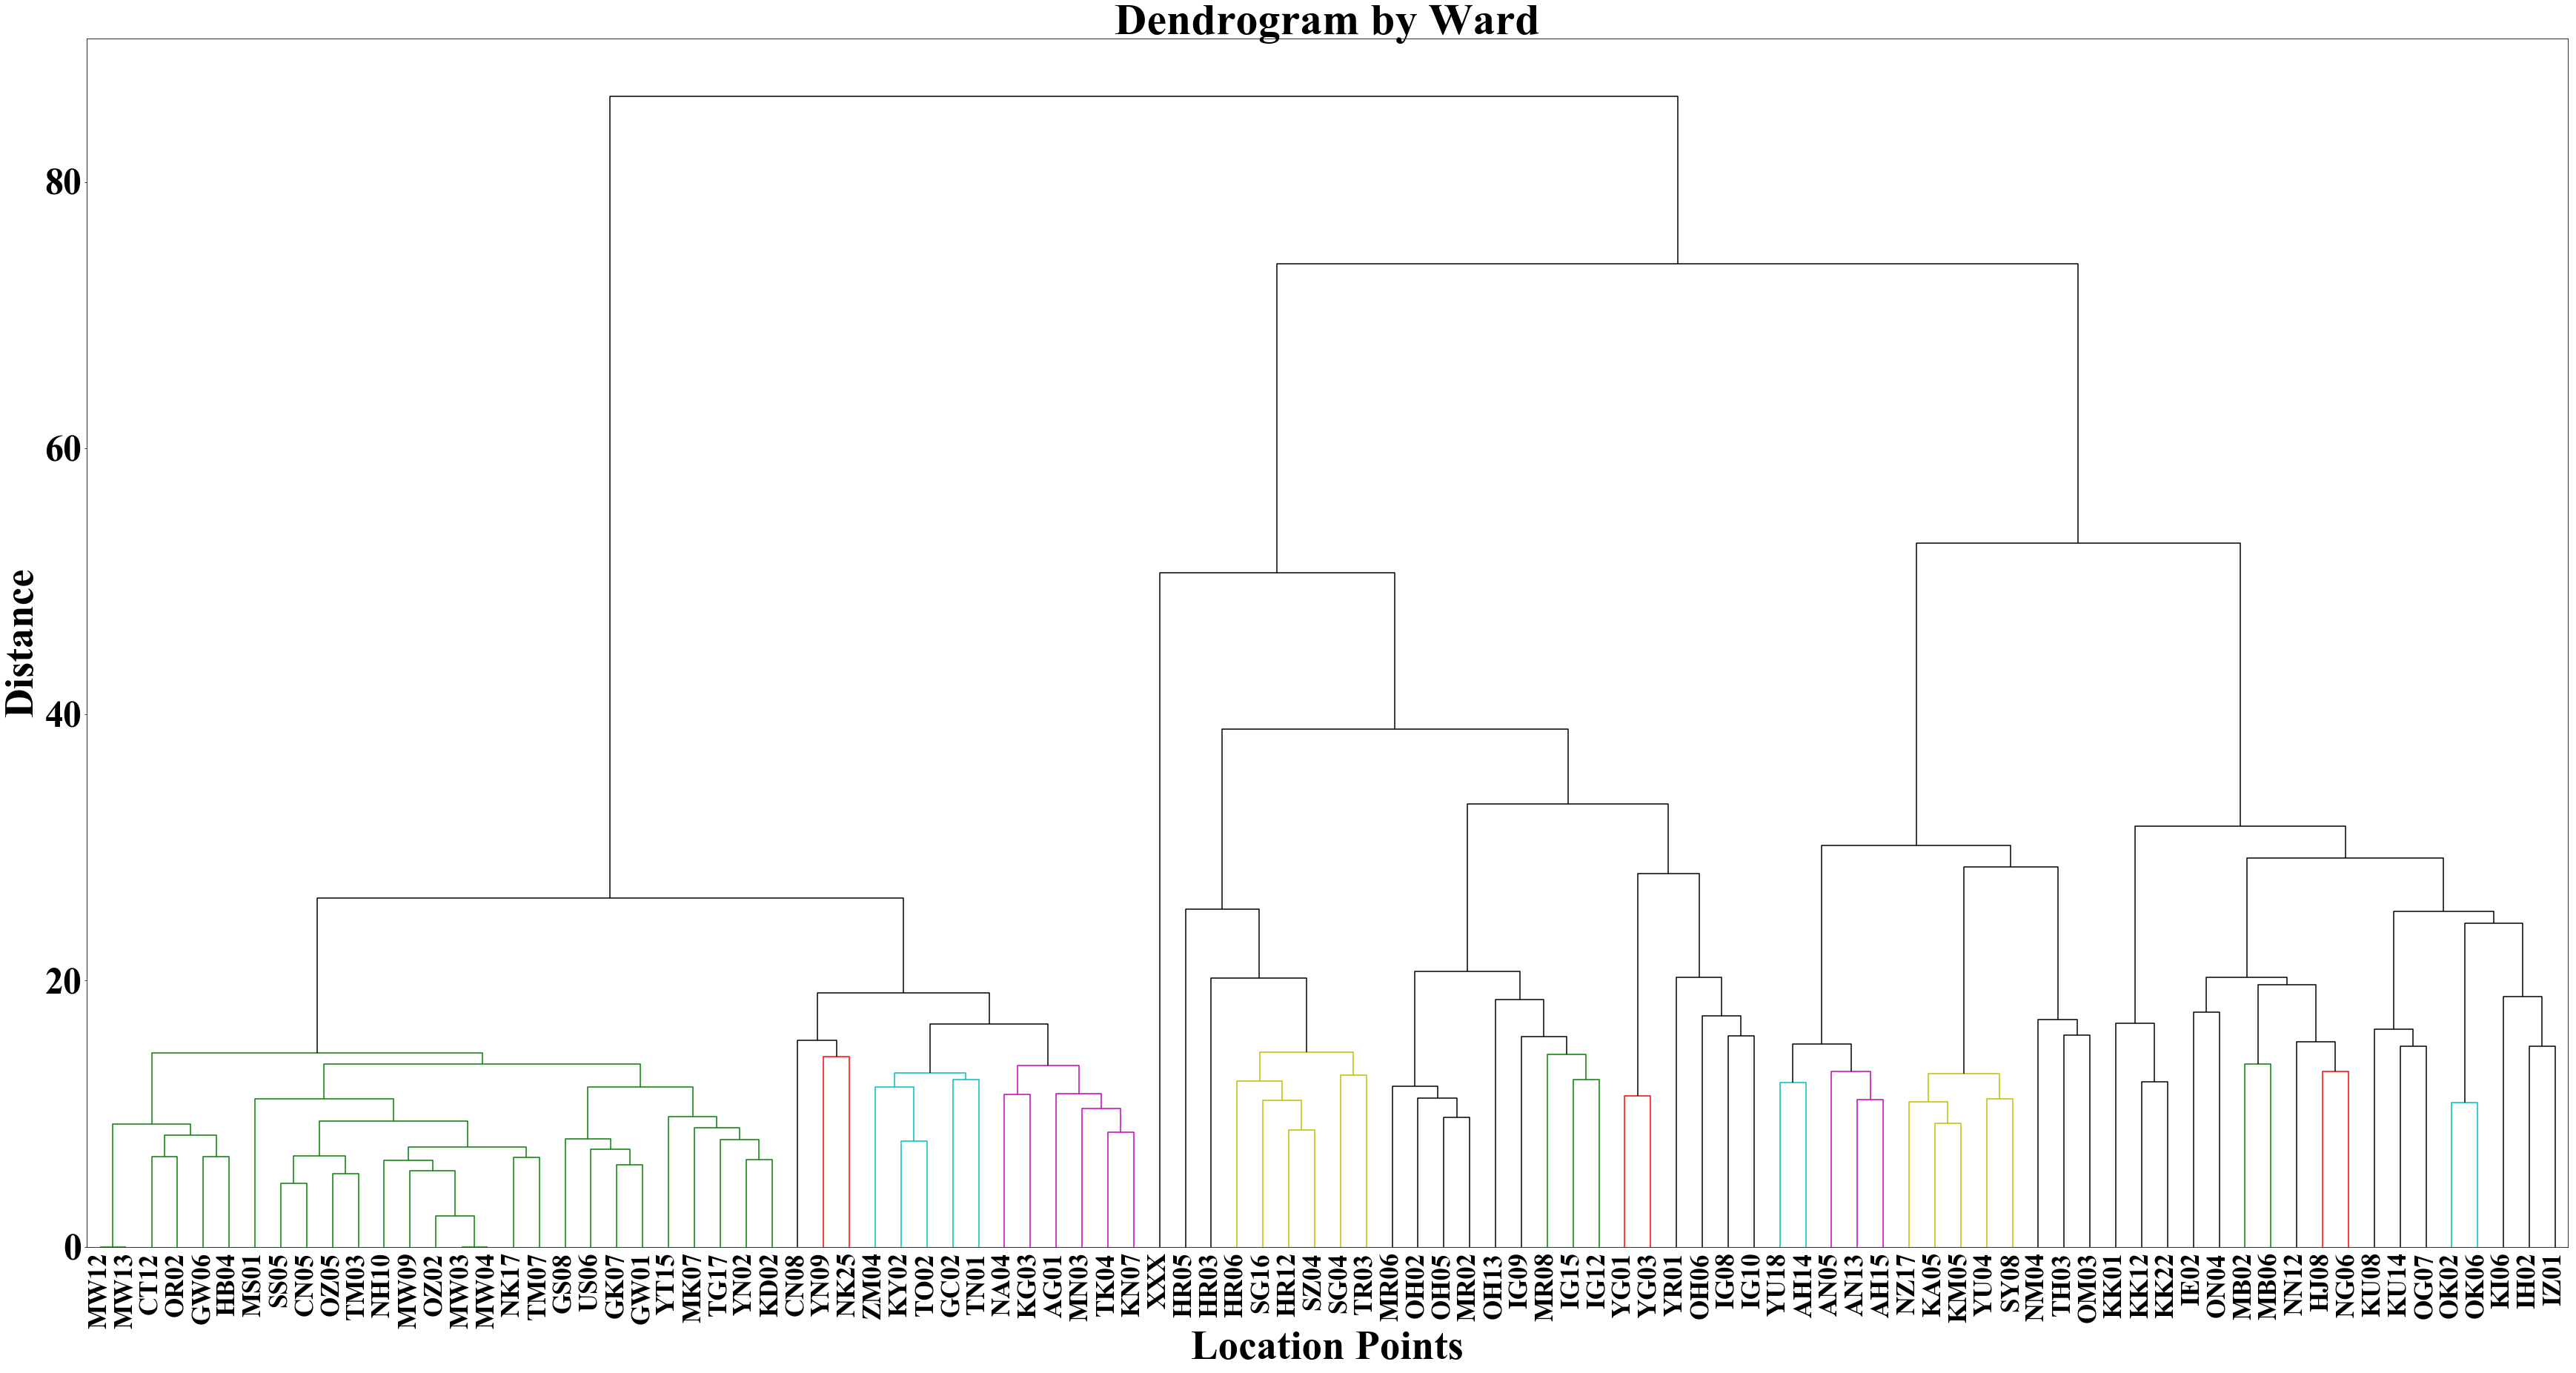

In [7]:
#図の生成
figtitle='Dendrogram by Ward'
himethod='ward'
savefile="./picture/clusters/wardCluster.png"
z = hierarchy.linkage(datasets, method=himethod)
plt.figure(figsize=(60,30))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('Location Points', fontsize=55)
plt.ylabel('Distance', fontsize=55)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=15., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(df.index)) # ユークリッド平方距離が７以上を黒色に指定
# plt.savefig(savefile)
plt.show()
plt.close()

In [6]:
locationfile="/Users/kazuki/Documents/Study/data/ryukyu/locations.xlsx"

In [7]:
ldf=pd.read_excel(locationfile,header=0,index_col=0)
# print(ldf)

In [10]:
# for i in pos1:
#     print("{}-{}".format(ldf.iat[i,0],ldf.iat[i,1]))

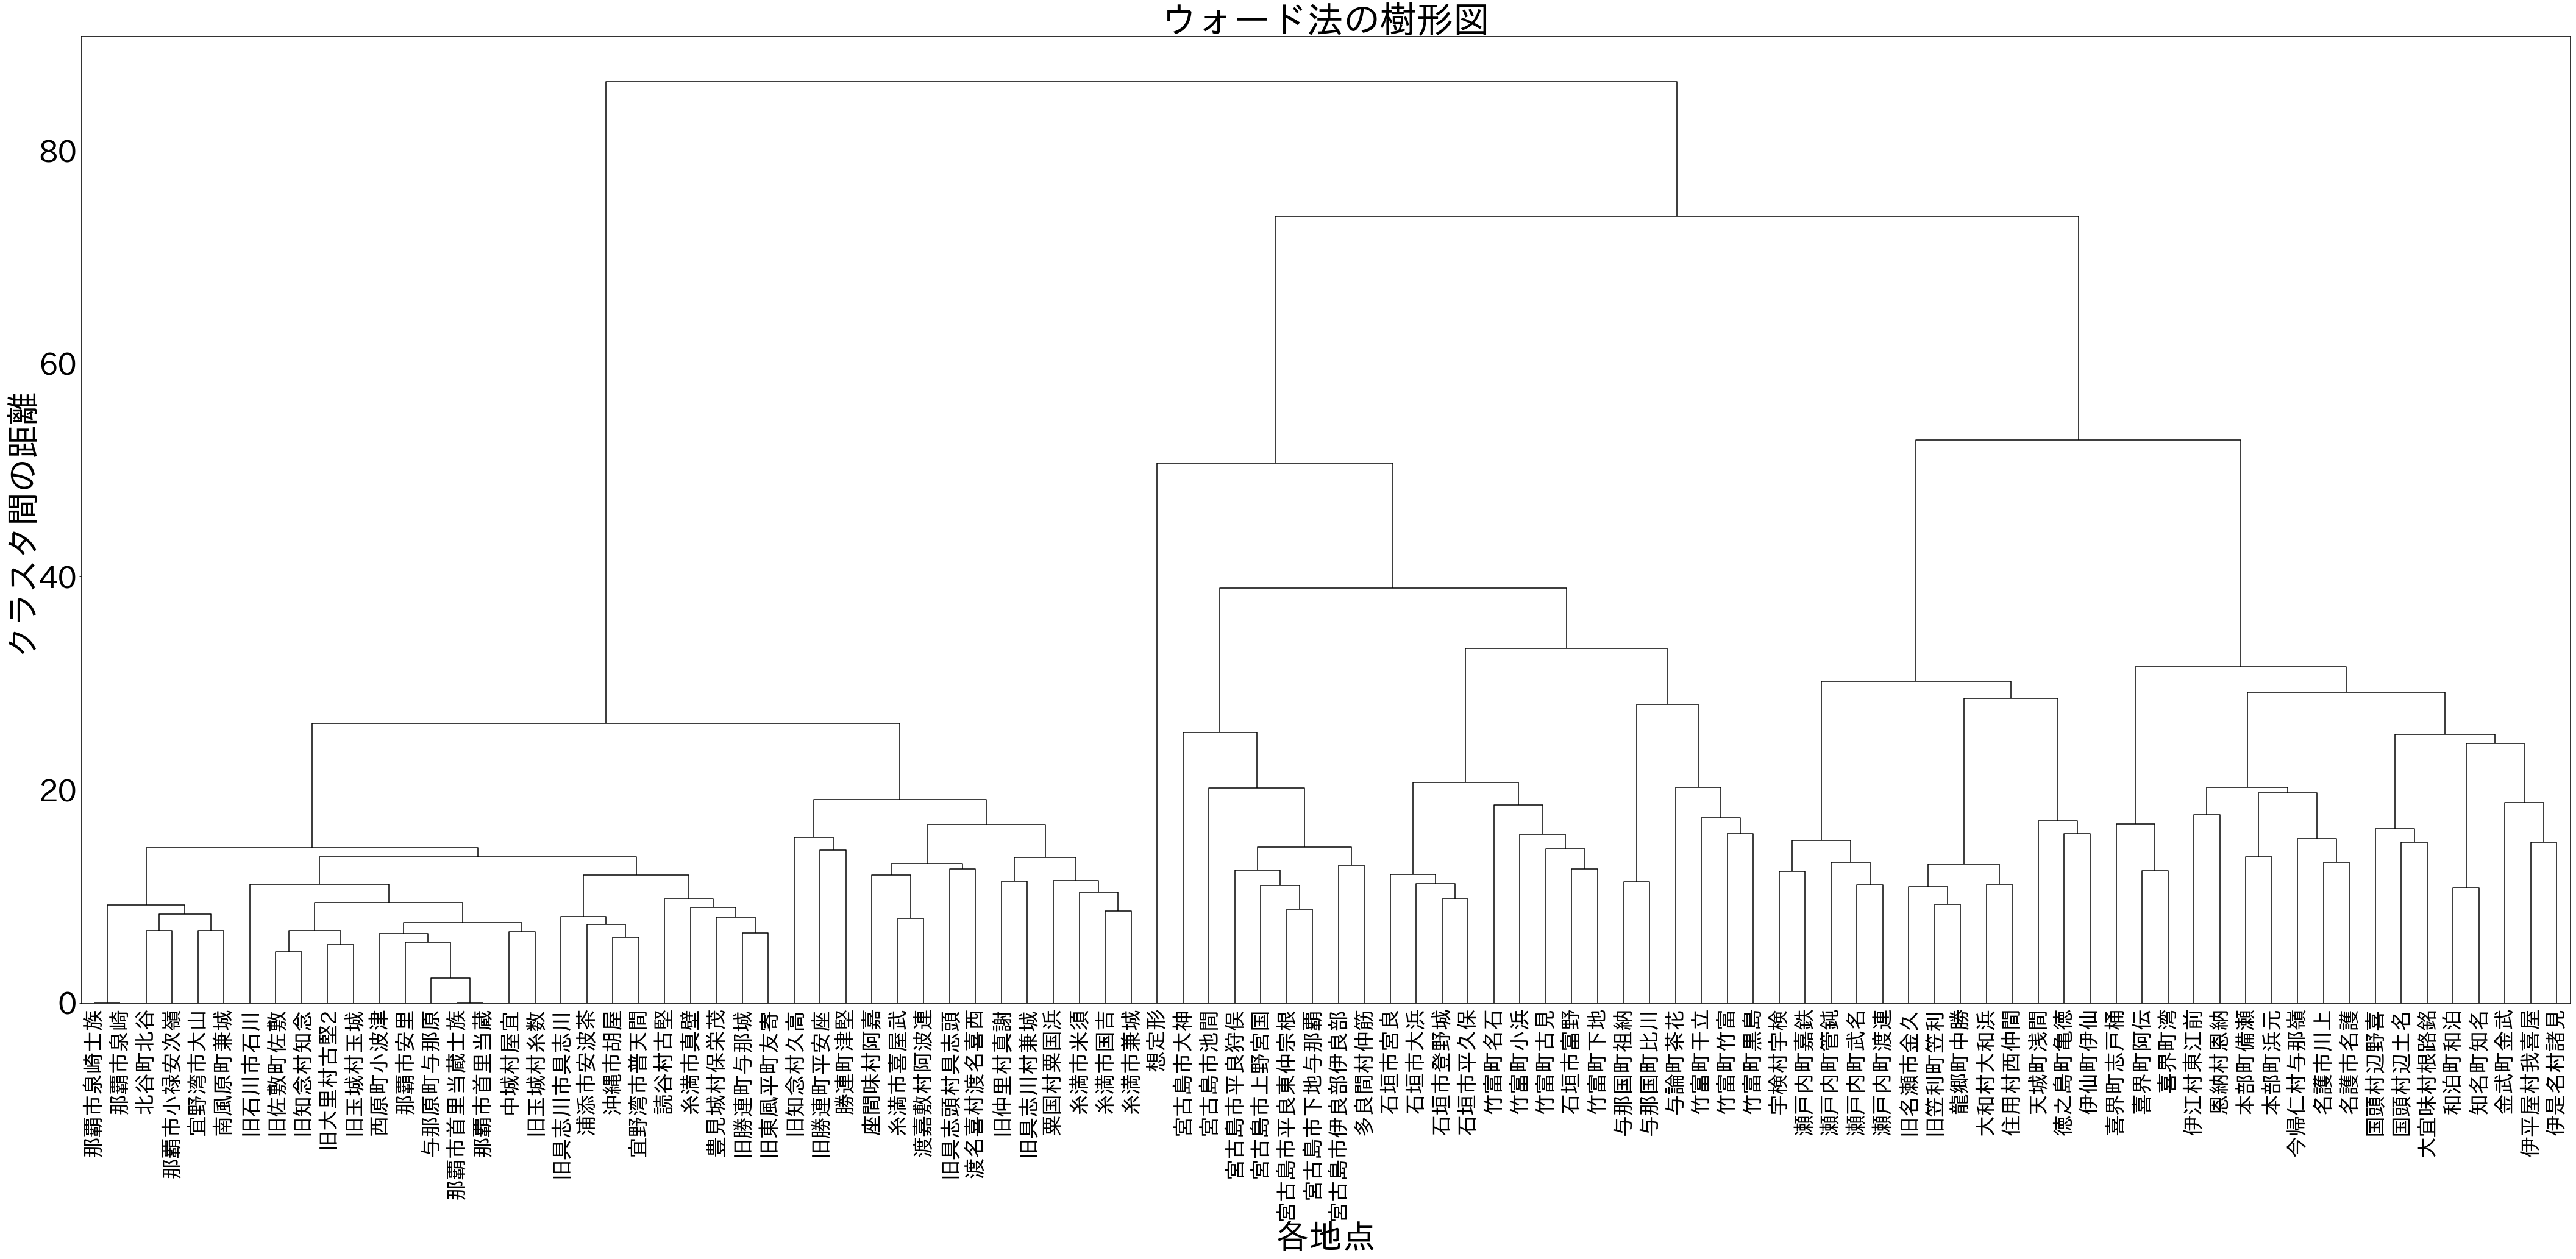

In [25]:
#図の生成
figtitle='ウォード法の樹形図'
himethod='ward'
savefile="./picture/clusters/wardClusterJP.png"
z = hierarchy.linkage(datasets, method=himethod)
plt.figure(figsize=(60,30))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('各地点', fontsize=55)
plt.ylabel('クラスタ間の距離', fontsize=55)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(ldf["現市町村名"])) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
plt.savefig(savefile)
plt.show()
plt.close()

[48, 49, 39, 67, 42, 51, 34, 54, 55, 53, 57, 44, 50, 52, 46, 47, 40, 58, 36, 43, 35, 41, 33, 63, 66, 37, 60, 56, 38, 45, 69, 62, 68, 59, 71, 72, 73, 70, 61, 64, 65, 0, 75, 74, 76, 79, 77, 78, 80, 81, 84, 83, 82, 85, 93, 89, 90, 86, 92, 94, 95, 19, 91, 87, 88, 6, 9, 7, 8, 10, 2, 1, 3, 4, 5, 14, 15, 16, 11, 12, 13, 22, 31, 27, 28, 26, 29, 30, 24, 23, 25, 17, 18, 32, 20, 21]


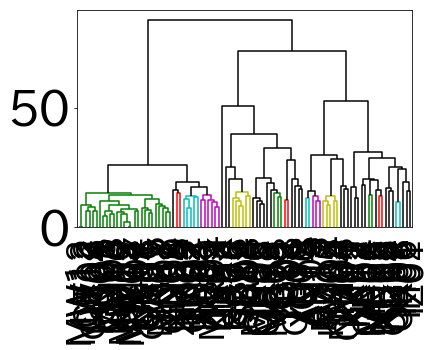

In [9]:
aa=hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=15., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(df.index)) # ユークリッド平方距離が７以上を黒色に指定
print(aa["leaves"])

In [13]:
for i,j in enumerate(ldf["現市町村名"]):
      print(i,j)

0 想定形
1 旧笠利町笠利
2 旧名瀬市金久
3 龍郷町中勝
4 大和村大和浜
5 住用村西仲間
6 宇検村宇検
7 瀬戸内町管鈍
8 瀬戸内町武名
9 瀬戸内町嘉鉄
10 瀬戸内町渡連
11 喜界町志戸桶
12 喜界町阿伝
13 喜界町湾
14 天城町浅間
15 徳之島町亀徳
16 伊仙町伊仙
17 和泊町和泊
18 知名町知名
19 与論町茶花
20 伊平屋村我喜屋
21 伊是名村諸見
22 伊江村東江前
23 国頭村辺土名
24 国頭村辺野喜
25 大宜味村根路銘
26 今帰仁村与那嶺
27 本部町備瀬
28 本部町浜元
29 名護市川上
30 名護市名護
31 恩納村恩納
32 金武町金武
33 読谷村古堅
34 旧石川市石川
35 沖縄市胡屋
36 旧具志川市具志川
37 旧勝連町与那城
38 旧勝連町平安座
39 北谷町北谷
40 中城村屋宜
41 宜野湾市普天間
42 宜野湾市大山
43 浦添市安波茶
44 西原町小波津
45 勝連町津堅
46 那覇市首里当蔵士族
47 那覇市首里当蔵
48 那覇市泉崎士族
49 那覇市泉崎
50 那覇市安里
51 南風原町兼城
52 与那原町与那原
53 旧大里村古堅2
54 旧佐敷町佐敷
55 旧知念村知念
56 旧知念村久高
57 旧玉城村玉城
58 旧玉城村糸数
59 旧具志頭村具志頭
60 旧東風平町友寄
61 糸満市米須
62 糸満市喜屋武
63 糸満市真壁
64 糸満市国吉
65 糸満市兼城
66 豊見城村保栄茂
67 那覇市小禄安次嶺
68 渡嘉敷村阿波連
69 座間味村阿嘉
70 粟国村粟国浜
71 渡名喜村渡名喜西
72 旧仲里村真謝
73 旧具志川村兼城
74 宮古島市池間
75 宮古島市大神
76 宮古島市平良狩俣
77 宮古島市平良東仲宗根
78 宮古島市下地与那覇
79 宮古島市上野宮国
80 宮古島市伊良部伊良部
81 多良間村仲筋
82 石垣市登野城
83 石垣市大浜
84 石垣市宮良
85 石垣市平久保
86 石垣市富野
87 竹富町竹富
88 竹富町黒島
89 竹富町小浜
90 竹富町古見
91 竹富町干立
92 竹富町下地
93 竹富町名石
94 与那国町祖納
95 与那国町比川


In [14]:
print(aa["leaves"].index(65))

40


In [17]:
new_area=aa["leaves"][0:41]
print(new_area)

[48, 49, 39, 67, 42, 51, 34, 54, 55, 53, 57, 44, 50, 52, 46, 47, 40, 58, 36, 43, 35, 41, 33, 63, 66, 37, 60, 56, 38, 45, 69, 62, 68, 59, 71, 72, 73, 70, 61, 64, 65]


In [18]:
new_df=df.iloc[new_area,]
print(new_df)

      <s>-k-u  k-u-b  u-b-i  b-i-.  <s>-n-u  n-u-b  u-b-u  b-u-i  u-i-.  \
MW12        2      1      1      1        1      0      0      0      1   
MW13        2      1      1      1        1      0      0      0      1   
CT12        3      1      1      1        1      0      0      0      1   
OR02        2      1      1      1        1      0      0      0      1   
GW06        2      1      1      1        1      0      0      1      2   
HB04        2      1      1      1        1      0      0      0      1   
MS01        1      0      0      0        1      0      0      0      0   
SS05        2      1      1      1        1      0      0      0      1   
CN05        2      1      1      1        1      0      0      0      1   
OZ05        2      1      1      1        1      0      0      1      2   
TM03        2      1      1      1        1      0      0      1      2   
NH10        2      1      1      1        1      0      0      0      1   
MW09        2      1     

In [19]:
new_dataset=new_df.values
new_ldf=ldf.iloc[new_area,]
print(new_ldf)

     地点名記号      現市町村名    表示用
通し番号                        
48    MW12    那覇市泉崎士族  那覇泉崎士
49    MW13      那覇市泉崎  那覇泉崎平
39    CT12      北谷町北谷   北谷北谷
67    OR02   那覇市小禄安次嶺  那覇安次嶺
42    GW06     宜野湾市大山   宜湾大山
51    HB04     南風原町兼城   南風兼城
34    MS01     旧石川市石川   石川石川
54    SS05     旧佐敷町佐敷   南城佐敷
55    CN05     旧知念村知念   南城知念
53    OZ05    旧大里村古堅2  南城古堅2
57    TM03     旧玉城村玉城   南城玉城
44    NH10     西原町小波津  西原小波津
50    MW09      那覇市安里   那覇安里
52    OZ02    与那原町与那原  与那与那原
46    MW03  那覇市首里当蔵士族  那覇当蔵士
47    MW04    那覇市首里当蔵  那覇当蔵平
40    NK17      中城村屋宜   北中屋宜
58    TM07     旧玉城村糸数   南城糸数
36    GS08   旧具志川市具志川  うる具志川
43    US06     浦添市安波茶  浦添安波茶
35    GK07      沖縄市胡屋   沖縄胡屋
41    GW01    宜野湾市普天間  宜湾普天間
33    YT15      読谷村古堅   読谷古堅
63    MK07      糸満市真壁   糸満真壁
66    TG17    豊見城村保栄茂  豊見保栄茂
37    YN02    旧勝連町与那城  うる与那城
60    KD02    旧東風平町友寄   八重友寄
56    CN08     旧知念村久高   南城久高
38    YN09    旧勝連町平安座  うる平安座
45    NK25      勝連町津堅   うる津堅
69    ZM04     座間味村阿嘉   座間阿嘉
62    KY02     糸満市喜屋武  糸満喜屋武
68    TO02    

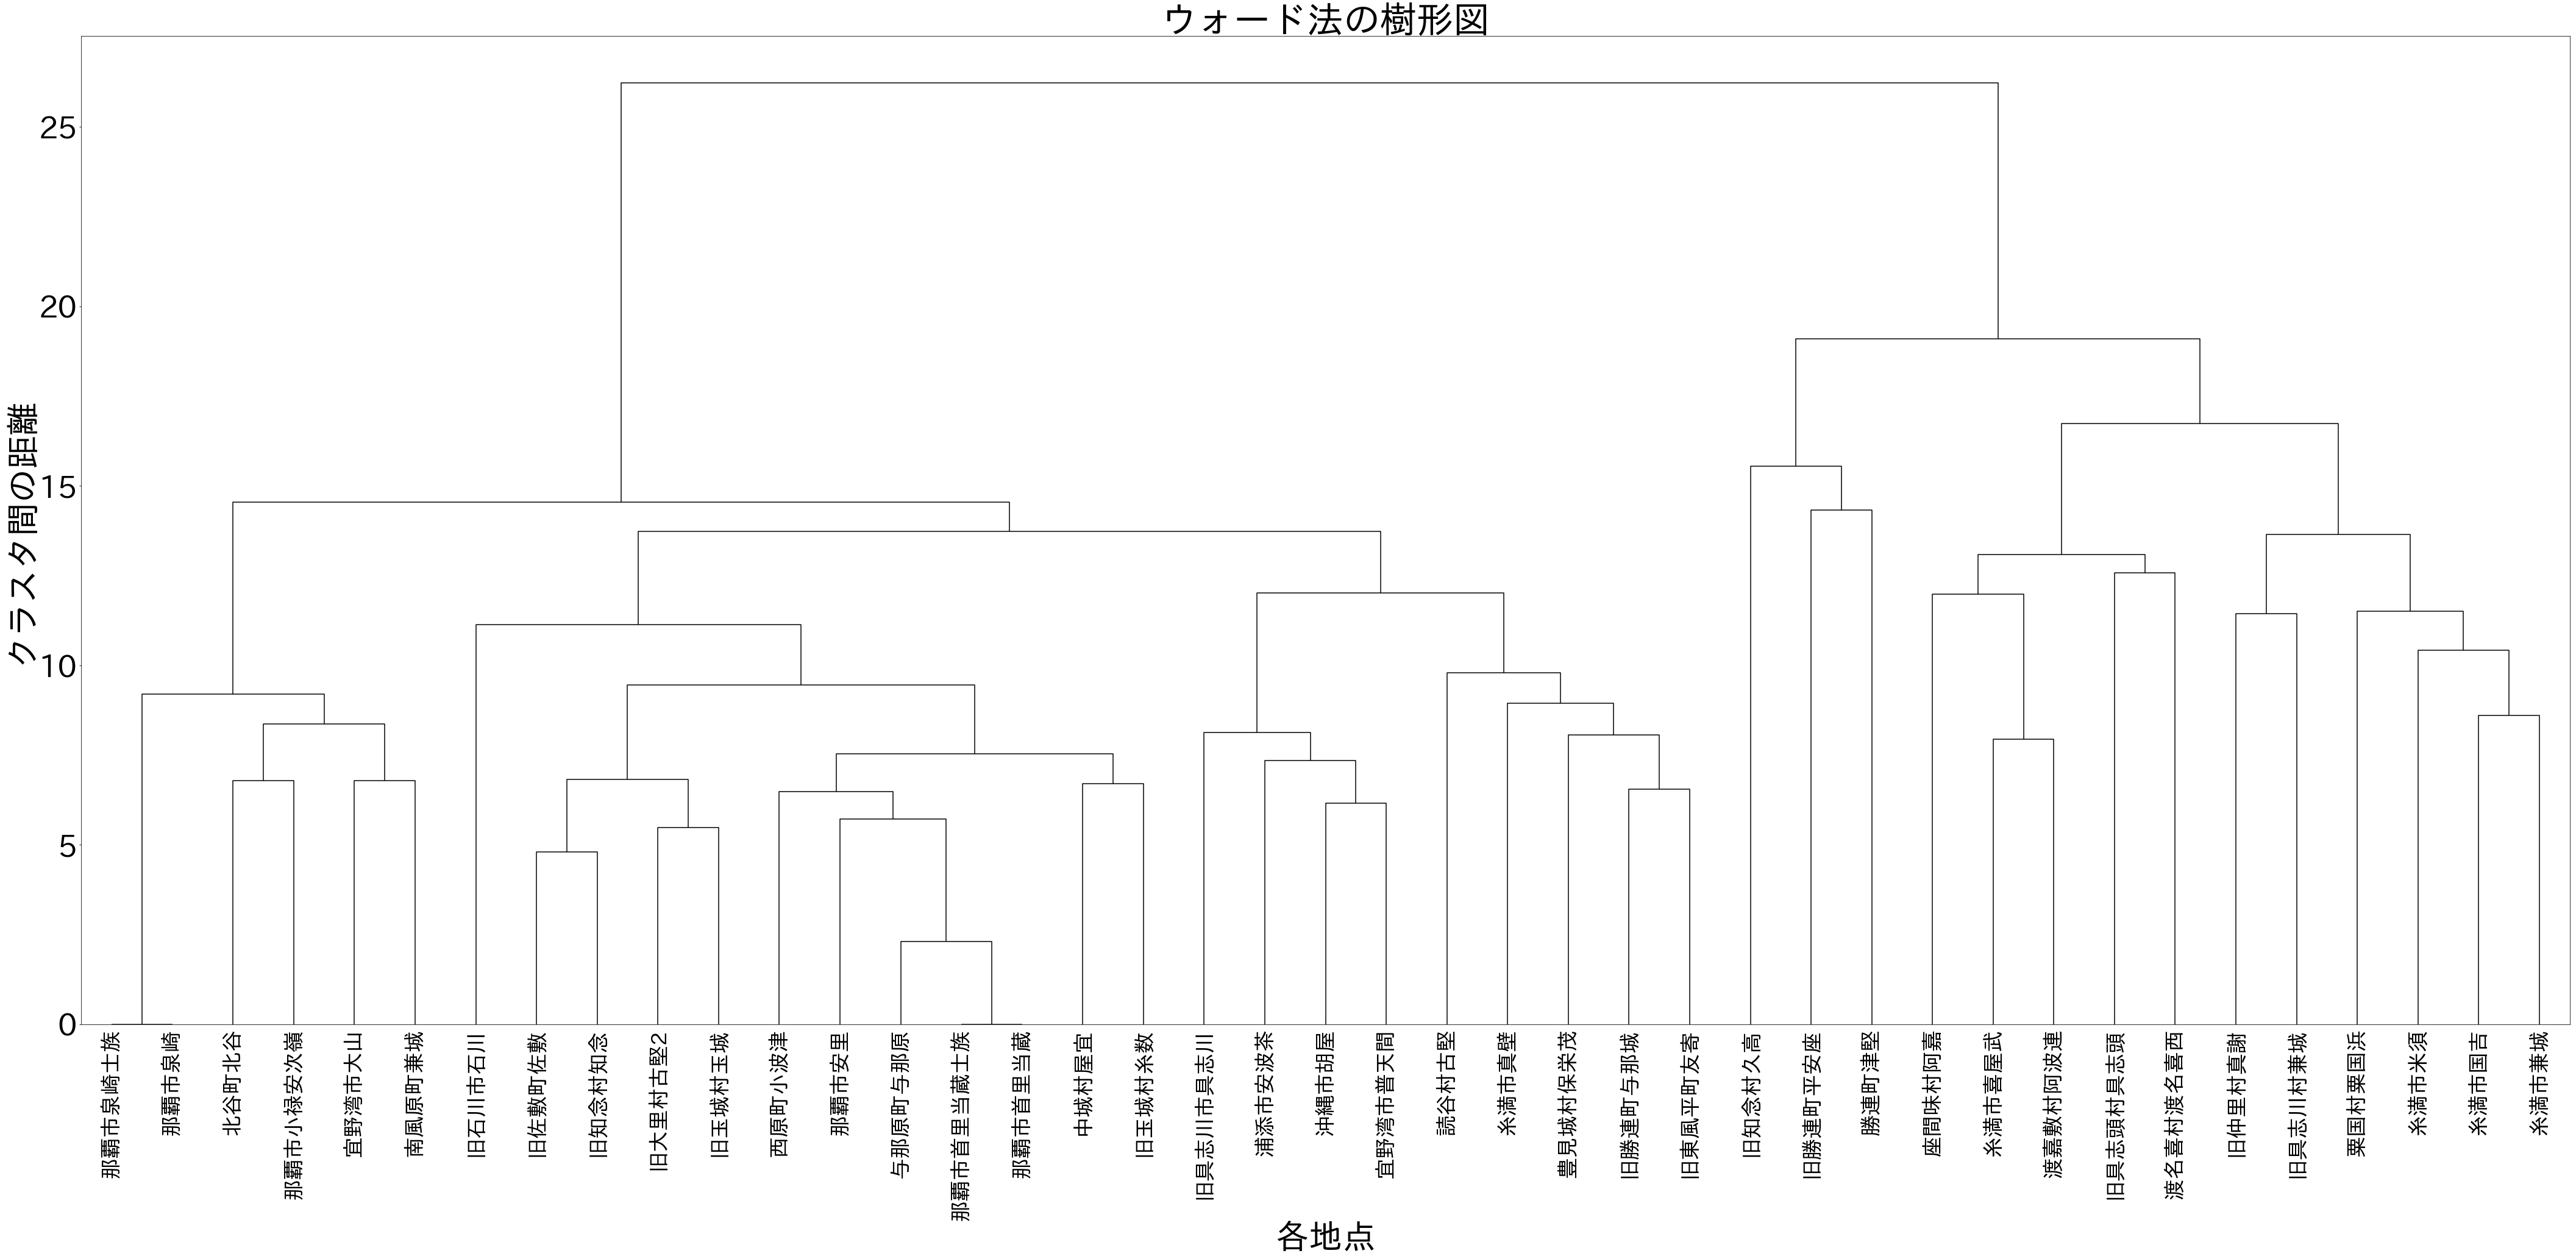

In [26]:
#図の生成
figtitle='ウォード法の樹形図'
himethod='ward'
savefile="./picture/clusters/wardClusterJPsmall.png"
z = hierarchy.linkage(new_dataset, method=himethod)
plt.figure(figsize=(60,30))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 50
plt.title(figtitle, fontsize=60)
plt.xlabel('各地点', fontsize=55)
plt.ylabel('クラスタ間の距離', fontsize=55)
# hierarchy.set_link_color_palette(['purple', 'lawngreen', 'green', 'blue', 'orange', 'red']) # ６クラスタまでの色を指定
hierarchy.dendrogram(z, leaf_font_size=35., # 横軸の文字の大きさを指定
                        color_threshold=0., # ユークリッド平方距離が７以上を同色で表示
                        above_threshold_color='black',
                        labels=tuple(new_ldf["現市町村名"])) # ユークリッド平方距離が７以上を黒色に指定
plt.tight_layout()
plt.savefig(savefile)
plt.show()
plt.close()

# 低次元マッピング